In [1]:
import matplotlib.pyplot as plt
import mnist
import numpy as np

In [2]:
data = mnist.load_mnist(flatten = True, one_hot_label=True)

In [3]:
training_idx = 0
test_idx = 1
image_idx = 0
label_idx = 1

In [102]:
data[training_idx][image_idx][0].shape

(784,)

perceptron calculation procedure

1. input data
2. calculate dot with input data and weight

In [21]:
inputDatum = data[training_idx][image_idx][0]

In [22]:
inputDatum[0].shape

()

In [123]:
inputDatum

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
weight1 = np.random.rand(len(inputDatum), 16)

In [117]:
weight1

array([[0.50209894, 0.01572444, 0.2535867 , ..., 0.83436156, 0.26356908,
        0.91618503],
       [0.0560039 , 0.00468458, 0.46794003, ..., 0.90788257, 0.67148687,
        0.83185883],
       [0.55444418, 0.50470766, 0.42796113, ..., 0.0902694 , 0.66361056,
        0.57381613],
       ...,
       [0.7358916 , 0.49519542, 0.19502588, ..., 0.54755209, 0.97484004,
        0.92414167],
       [0.04934916, 0.8823921 , 0.04776819, ..., 0.19597319, 0.72504477,
        0.96566728],
       [0.4728583 , 0.44454363, 0.29472916, ..., 0.47307596, 0.40026091,
        0.32039567]], shape=(784, 16))

In [88]:
# visualize weight

In [72]:
weight1.shape

(784, 16)

In [85]:
weight1img = weight1.T[0].reshape(28, 28)

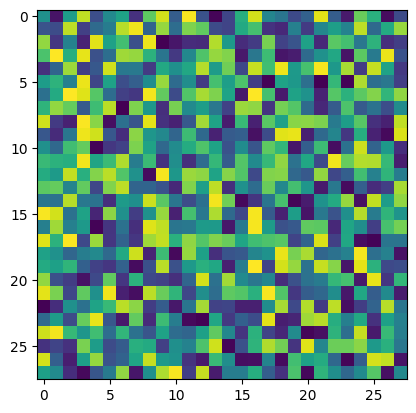

In [87]:
plt.imshow(weight1img)

In [118]:
# make visualize process in function
# before input to weight, weight should be translate
def visualizeWeight(weight):
    weightImg = weight.reshape(28, 28)
    return weightImg

In [120]:
xw = np.dot(inputDatum, weight1)

In [121]:
xw.shape

(16,)

In [122]:
xw

array([51.67122034, 53.69384819, 51.82553583, 54.91652324, 53.60476908,
       56.5979369 , 53.65395067, 55.5857183 , 51.22799457, 50.41093935,
       52.54583766, 54.09604115, 53.36637886, 59.69656246, 53.59822236,
       59.24791328])

In [28]:
bias = np.random.rand(16, )

In [30]:
layer1 = xw + bias

In [32]:
layer1 # input * weight + bias

array([52.6471608 , 53.73420643, 52.74021515, 55.21644159, 54.21539983,
       57.35768759, 53.81840806, 56.40881041, 51.92601196, 51.31650062,
       52.66967484, 54.27848329, 53.52820318, 60.66024813, 54.40903973,
       59.77590113])

In [33]:
# layer2

In [34]:
weight2 = np.random.rand(len(layer1), 16)

In [35]:
weight2.shape

(16, 16)

In [36]:
l1w2 = np.dot(layer1, weight2)

In [37]:
l1w2.shape

(16,)

In [38]:
bias = np.random.rand(16, )

In [39]:
layer2 = l1w2 + bias

In [40]:
layer2.shape

(16,)

In [41]:
layer2

array([447.20498406, 487.6428699 , 377.91183984, 552.81525806,
       423.0941889 , 466.0873322 , 372.03994717, 469.72367812,
       404.59871075, 511.76176966, 508.29942731, 345.82274544,
       351.07815153, 338.02764177, 446.38485626, 434.62434092])

In [44]:
def relu(x):
    return np.maximum(0, x)

In [47]:
# output layer

In [48]:
weight3 = np.random.rand(len(layer2), 10)

In [50]:
weight3.shape

(16, 10)

In [51]:
l2w3 = np.dot(layer2, weight3)

In [52]:
l2w3.shape

(10,)

In [53]:
bias = np.random.rand(10, )

In [54]:
layer3 = l2w3 + bias

In [55]:
layer3.shape

(10,)

In [56]:
output = relu(layer3)

In [64]:
result = output // np.max(output)

In [70]:
np.where(result == 1)

(array([6]),)

In [71]:
# compare result with training data

In [92]:
inputDatum.shape

(784,)

In [99]:
np.where(data[training_idx][label_idx][0] == 1)

(array([5]),)

In [100]:
# result is 6
# label is 5
# not correct

In [103]:
# 中間層は2層ある
# それぞれの層は16個のニューロンを持つ
# 単純に積算をするだけ。

def nnv1(inputData):
    weight1 = np.random.rand(len(inputData), 16)
    inputWeight1 = np.dot(inputData, weight1)
    bias1 = np.random.rand(16, )
    layer1 = inputWeight1 + bias1

    weight2 = np.random.rand(len(layer1), 16)
    layer1weight2 = np.dot(layer1, weight2)
    bias2 = np.random.rand(16, )
    layer2 = layer1weight2 + bias2

    weight3 = np.random.rand(len(layer2), 10)
    layer2weight3 = np.dot(layer2, weight3)
    bias3 = np.random.rand(10, )
    layer3 = layer2weight3 + bias3

    output = relu(layer3)

    result = output // np.max(output)
    return result

In [109]:
inputData = data[training_idx][image_idx]
labelData = data[training_idx][label_idx]

In [111]:
print(inputData.shape)
print(labelData.shape)

(60000, 784)
(60000, 10)


In [113]:
nnv1(inputData[0])

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [115]:
labelData[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])